In [2]:
%cd D:/Steven/Proyecto_de_curso_CVwDP/dataset

[WinError 3] El sistema no puede encontrar la ruta especificada: 'D:/Steven/Proyecto_de_curso_CVwDP/dataset'
D:\Universidad\Computer_Vision_UAO\Proyecto_de_curso_CVwDP\od_distanciamiento_social


In [4]:
import pandas as pd


In [8]:
#Asignando 3 variables a las tablas de datos separados por coma de openimage
img_box_nombre ='D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/train-images-boxable-with-rotation.csv'
anota_box_nombre = 'D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/train-annotations-bbox.csv'
clase_desc_nombre = 'D:/Universidad/Computer_Vision_UAO/Proyecto_de_curso_CVwDP/od_distanciamiento_social/class-descriptions-boxable.csv'

In [9]:
#Comprendiendo como son los encabezados de cada tabla pasada a dataframe
img_box_pd = pd.read_csv(img_box_nombre)
img_box_pd.head(5)

,ImageID,Subset,OriginalURL,OriginalLandingURL,License,AuthorProfileURL,Author,Title,OriginalSize,OriginalMD5,Thumbnail300KURL,Rotation
0,4fa8054781a4c382,train,https://farm3.staticflickr.com/5310/5898076654...,https://www.flickr.com/photos/michael-beat/589...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/michael-beat/,Michael Beat,...die FNF-Kerze,4405052,KFukvivpCM5QXl5SqKe41g==,https://c1.staticflickr.com/6/5310/5898076654_...,0.0
1,b37f763ae67d0888,train,https://c1.staticflickr.com/1/67/197493648_628...,https://www.flickr.com/photos/drstarbuck/19749...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/drstarbuck/,Karen,Three boys on a hill,494555,9IzEn38GRNsVpATuv7gzEA==,https://c3.staticflickr.com/1/67/197493648_628...,0.0
2,7e8584b0f487cb9e,train,https://c7.staticflickr.com/8/7056/7143870979_...,https://www.flickr.com/photos/circasassy/71438...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/circasassy/,CircaSassy,A Christmas carol and The cricket on the heart...,2371584,3hQwu0iSzY1VIoXiwp0/Mg==,https://c7.staticflickr.com/8/7056/7143870979_...,0.0
3,86638230febe21c4,train,https://farm5.staticflickr.com/5128/5301868579...,https://www.flickr.com/photos/ajcreencia/53018...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/ajcreencia/,Alex,Abbey and Kenny,949267,onB+rCZnGQg5PRX7xOs18Q==,https://c4.staticflickr.com/6/5128/5301868579_...,NaN
4,249086e72671397d,train,https://c6.staticflickr.com/4/3930/15342460029...,https://www.flickr.com/photos/codnewsroom/1534...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/codnewsroom/,COD Newsroom,Suburban Law Enforcement Academy 20th Annivers...,6541758,MjpaAVbMAWbCusSaxI1D7w==,https://c1.staticflickr.com/4/3930/15342460029...,0.0


In [10]:
anota_box_pd = pd.read_csv(anota_box_nombre)
anota_box_pd.head(5)

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


In [15]:
#Para este caso toca  asegurarse de no tomar en cuenta encabezado por que no tiene
clas_desc_pd = pd.read_csv(clase_desc_nombre, header=None)
clas_desc_pd.head()

,0,1
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


In [16]:
import random
import os
from skimage import io
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [37]:
#Este código es irrelevante, solo sirve para tomar aleatoriamente imagenes a partir de su ID
test_img_id = anota_box_pd["ImageID"].value_counts().head(100).index.values
test_img_id = random.sample(list(test_img_id),1)
print(test_img_id)
#test_img_id =['ca6e2a230f1576b6']  #persona   ['113a08c061582251'] #cafe  ['3c095a6526719d58'] #araña ['72d8ea9eb960c980'] #muchas cosas
#test_img_id=['371dfb0603858dbb']#['d311f6ba6548e60e']	

['716ab38de1366ab4']


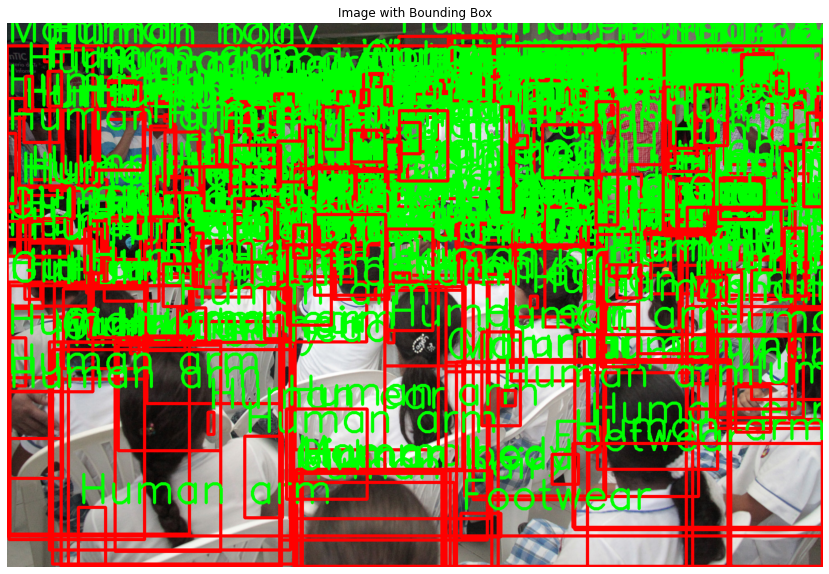

In [42]:
#Este codigo muestra todas las boxes dentro de una imagen. Luego será usado nuevamente
img_url =img_box_pd.loc[img_box_pd["ImageID"]==test_img_id[0]]['OriginalURL'].values[0]
img = io.imread(img_url)
h,w,ch =img.shape
bbox = anota_box_pd[anota_box_pd['ImageID']==test_img_id[0]]
for i,f in bbox.iterrows():
  xmin =int(f['XMin']*w)
  xmax = int(f['XMax']*w)
  ymin = int(f['YMin']*h)
  ymax = int(f['YMax']*h)
  label = f['LabelName']
  clase = clas_desc_pd[clas_desc_pd[0]==label]
  cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
  font = cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(img, clase[1].values[0], (xmin,ymin-10), font, 3, (0,255,0), 5)
plt.figure(figsize=(15,10))
plt.title('Image with Bounding Box')
plt.imshow(img)
plt.axis("off")
plt.show()

In [40]:
#Buscar en la tabla de descripciones de clases los ID de Personas y Carros
clas_desc_pd.loc[clas_desc_pd[1].isin(['Person'])]

,0,1
68,/m/01g317,Person


In [43]:
#Tomemos aleatoriamente 100 imagenes de personas y 100 de carros
#Lineas de clases
persona_pd =clas_desc_pd[clas_desc_pd[1]=='Person']
#Etiquetas de clases (Estas etiquetas serán primordiales cuando se vaya a copiar a disco local)
persona_label_pd = persona_pd[0].values[0]
#Usemos las etiquetas para bajar las box de anotaciones
persona_box_an= anota_box_pd[anota_box_pd['LabelName']==persona_label_pd]
#Bajemos los ID de las clases
persona_id=persona_box_an['ImageID']
#Dado que pueden haber varias personas en una imagen, podrían aparecer ID's repetidos. Vamos a usar una sola
persona_id = np.unique(persona_id)
#******Escoger aleatoriamente 1000 imagenes de cada clase
n=1000
sub_persona_id =random.sample(list(persona_id),n)



In [44]:
#Usemos pandas para crear los dos conjuntos de datos a partir de los Sub ID's
sub_persona_pd = img_box_pd.loc[img_box_pd['ImageID'].isin(sub_persona_id)]
sub_persona_pd.shape


(1000, 12)

In [45]:
sub_persona_pd.head()

,ImageID,Subset,OriginalURL,OriginalLandingURL,License,AuthorProfileURL,Author,Title,OriginalSize,OriginalMD5,Thumbnail300KURL,Rotation
384,aa5f2f77f44d3b0f,train,https://c8.staticflickr.com/1/132/417661856_6d...,https://www.flickr.com/photos/lollyknit/417661856,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/lollyknit/,LollyKnit,Mirror Egg Reflections,233818,rX5hnD3JQ3R5eXkaV4BrNg==,https://c8.staticflickr.com/1/132/417661856_d9...,0.0
1423,82207ce756964e04,train,https://farm5.staticflickr.com/3619/3624315987...,https://www.flickr.com/photos/mecklenburg/3624...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/mecklenburg/,Thomas Kohler,Liegestühle auf der BUGA,396403,OKhehgmhn8TA+dJ41Q6I/Q==,https://c3.staticflickr.com/4/3619/3624315987_...,0.0
2361,b106a1e731d3c04d,train,https://c6.staticflickr.com/8/7381/13941381157...,https://www.flickr.com/photos/dforseckorive/13...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/dforseckorive/,dforseckorive,DSCF3056.jpg,2740253,0Cvt+QS11K5ps34/KFw8+Q==,https://c4.staticflickr.com/8/7381/13941381157...,0.0
6336,a53c5e55978ed964,train,https://farm5.staticflickr.com/7296/1636309803...,https://www.flickr.com/photos/summonedbyfells/...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/summonedbyfells/,summonedbyfells,ALEX'S BAR IN THE GOLDEN EAGLE RESTARUANT,1311847,53NoumyjWT+H5eZ0YIASeg==,https://c4.staticflickr.com/8/7296/16363098039...,0.0
7378,b7fcf73601d43a50,train,https://farm1.staticflickr.com/516/18601438546...,https://www.flickr.com/photos/repolco/18601438...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/repolco/,Irina,Jean-Baptiste Le Prince - Russian Cradle,457977,atFIBo2su55EpaAniugUxg==,https://c6.staticflickr.com/1/516/18601438546_...,0.0


In [46]:
#Convirtiendo los dos subgrupos de imagenes en diccionarios.
sub_persona_dict =sub_persona_pd[['ImageID', 'OriginalURL']].set_index('ImageID')["OriginalURL"].to_dict()



In [47]:
clases = [sub_persona_dict]


In [48]:
len(clases[0])

1000

In [47]:
#Creando dos carpetas en el ambiente virtual para copiar las imagenes de los dos subgrupos
!mkdir "Person"


In [ ]:
"""Salvando las imagenes a nuestros directorios locales. Observe el uso de "try" porque 
es posible que alguna dirección ya no exista"""
c=0
for i,o in enumerate(['Person']):
  errores=0
  
  for img_id, url in clases[i].items():
    try:
      c += 1
      print("guardando img {}".format(c))
      img = io.imread(url)
      ruta = o +'/'+img_id+".jpg"
      io.imsave(ruta,img)
    except Exception as e:
      errores+=1
  print(f"Imagenes perdidas:{errores}")



guardando img 1
guardando img 2
guardando img 3
guardando img 4
guardando img 5
guardando img 6
guardando img 7
guardando img 8
guardando img 9
guardando img 10
guardando img 11
guardando img 12
guardando img 13
guardando img 14
guardando img 15
guardando img 16
guardando img 17
guardando img 18
guardando img 19
guardando img 20
guardando img 21
guardando img 22
guardando img 23
guardando img 24
guardando img 25
guardando img 26
guardando img 27
guardando img 28
guardando img 29
guardando img 30
guardando img 31
guardando img 32
guardando img 33
guardando img 34
guardando img 35
guardando img 36
guardando img 37
guardando img 38
guardando img 39
guardando img 40
guardando img 41
guardando img 42
guardando img 43
guardando img 44
guardando img 45
guardando img 46
guardando img 47
guardando img 48
guardando img 49
guardando img 50
guardando img 51
guardando img 52
guardando img 53
guardando img 54
guardando img 55
guardando img 56
guardando img 57
guardando img 58
guardando img 59
guarda

In [ ]:
#Creemos los directorios de train y test en nuestro drive
!mkdir "D:/Steven/Proyecto_de_curso_CVwDP/dataset/train1000"
!mkdir "D:/Steven/Proyecto_de_curso_CVwDP/dataset/test1000"

train_path="D:/Steven/Proyecto_de_curso_CVwDP/dataset/train1000/"
test_path="D:/Steven/Proyecto_de_curso_CVwDP/dataset/test1000/"



In [ ]:
from shutil import copyfile

In [ ]:
"""Este codigo nos permite tomar el 80% de las 200 imagenes (carros y personas) y
copiarlas a la carpeta train. El 20% restante copiadas a la carpeta test."""
clas=['Person']
for i in range(len(clas)):
  imgs = os.listdir(clas[i])
  random.shuffle(imgs)
  percent = int(n*0.8)
  train_imgs=imgs[:percent]
  test_imgs = imgs[percent:]

  for f in range(len(train_imgs)):
    src = os.path.join(clas[i],train_imgs[f])
    dst = os.path.join(train_path+train_imgs[f])
    copyfile(src,dst)
  for f in range(len(test_imgs)):
    src = os.path.join(clas[i],test_imgs[f])
    dst = os.path.join(test_path+test_imgs[f])
    copyfile(src,dst)
#print(imgs)

In [ ]:
import sys

In [ ]:
"""Aqui creamos un dataframe de pandas con la información
que es necesaria para nuestro entrenamiento: nombre del archivo imagen,
x1,x2,y1,y2 (datos de la box) y la etiqueta de clase (Persona o Carro).""" 
clas=['Person']
etiquetas =[persona_label_pd]
train_df = pd.DataFrame(columns=['Nombre','Xmin','Xmax','Ymin', 'Ymax','Label'])

train_imgs = os.listdir(train_path)
c=0
for i in range(len(train_imgs)):
  c=c+1
  print("imagen procesada para train: {}".format(c))
  sys.stdout.flush()
  img_nombre = train_imgs[i]
  img_id=img_nombre[0:16]
  tmp_df = anota_box_pd[anota_box_pd['ImageID']==img_id]
  for index, row in tmp_df.iterrows():
    labelName = row['LabelName']
    for i in range(len(etiquetas)):
      if labelName == etiquetas[i]:
        train_df = train_df.append({'Nombre':img_nombre,
                                    'Xmin':row['XMin'],
                                    'Xmax':row['XMax'],
                                    'Ymin':row['YMin'],
                                    'Ymax':row['YMax'],
                                    'Label':clas[i]},
                                   ignore_index=True)


In [ ]:
train_df.head(10)

In [ ]:
#Es claro que este valor sera mayor al numero de imagenes de la carpeta train
train_df.shape

In [ ]:
#Realizando lo mismo para la carpeta de test.
test_df = pd.DataFrame(columns=['Nombre','Xmin','Xmax','Ymin', 'Ymax','Label'])

test_imgs = os.listdir(test_path)
c=0
for i in range(len(test_imgs)):
  sys.stdout.flush()
  c=c+1
  print("imagen procesada para test: {}".format(c))
  img_nombre = test_imgs[i]
  img_id=img_nombre[0:16]
  tmp_df = anota_box_pd[anota_box_pd['ImageID']==img_id]
  for index, row in tmp_df.iterrows():
    labelName = row['LabelName']
    for i in range(len(etiquetas)):
      if labelName == etiquetas[i]:
        test_df = test_df.append({'Nombre':img_nombre,
                                    'Xmin':row['XMin'],
                                    'Xmax':row['XMax'],
                                    'Ymin':row['YMin'],
                                    'Ymax':row['YMax'],
                                    'Label':clas[i]},
                                   ignore_index=True)

In [ ]:
#convirtiendo los dataframes creados a archivos CSV.
train_df.to_csv('train.csv')
test_df.to_csv('test.csv')


In [ ]:
"""Este codigo nos sirve para crear un archivo texto donde estara la informacion
de cada imagen de entrenamiento con sus datos de bbox y etiqueta.
Observe como cada linea es un bbox diferente. El archivo de imagen se puede repetir
tantas veces como bbox tenga la imagen."""
train_df = pd.read_csv('train.csv')
c=0
with open("D:Steven/od_distanciamiento_social/keras-retinanet/entrenamiento1000.txt", 'w+') as f:
  for idx, row in train_df.iterrows():
    c += 1
    print("Agregando imagen {} al archivo".format(c))
    img = cv2.imread(train_path+ row['Nombre'])
    h,w = img.shape[:2]
    x1 = int(row['Xmin']*w)
    x2 = int(row['Xmax']*w)
    y1 = int(row['Ymin']*h)
    y2 = int(row['Ymax']*h)
    archivo = os.path.join(train_path,row['Nombre'])
    label = row['Label']
    f.write(archivo + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + label + '\n')



In [ ]:
#Igualmente para el archivo test.

test_df = pd.read_csv('test.csv')
c=0
with open("D:/Steven/od_distanciamiento_social/keras-retinanet/test1000.txt", 'w+') as f:
  for idx, row in test_df.iterrows():
    c += 1
    print("Agregando imagen {} al archivo".format(c))
    img = cv2.imread(test_path+ row['Nombre'])
    h,w = img.shape[:2]
    x1 = int(row['Xmin']*w)
    x2 = int(row['Xmax']*w)
    y1 = int(row['Ymin']*h)
    y2 = int(row['Ymax']*h)
    archivo = os.path.join(test_path,row['Nombre'])
    label = row['Label']
    f.write(archivo + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + label + '\n')


**FIN!!!!.
Revise en su drive y compruebe que exista una carpeta llamada FasterRCNN y dentro de ella los dos archivos de texto (test y train), tambien deberá estar una subcarpeta llamada dataset y dentro de esta dos subcarpetas: train que contiene todas las imagenes fisicas de entrenamiento, y test, que contiene las iamgenes fisicas de prueba o validacion.**